In [1]:
import numpy as np
import pandas as pd
data=pd.read_csv("C:/Users/vanda/Desktop/AI Days/Internship/Meter_hour_data.csv")
data.head(10)

,Unnamed: 0,ServiceconnId,Block_kwh,DATETIMES
0,0,29369,0.21,2021-06-01 00:00:00
1,1,29369,0.24,2021-06-01 01:00:00
2,2,29369,0.23,2021-06-01 02:00:00
3,3,29369,0.16,2021-06-01 03:00:00
4,4,29369,0.07,2021-06-01 04:00:00
5,5,29369,0.08,2021-06-01 05:00:00
6,6,29369,0.07,2021-06-01 06:00:00
7,7,29369,0.40,2021-06-01 07:00:00
8,8,29369,0.06,2021-06-01 08:00:00
9,9,29369,0.06,2021-06-01 09:00:00


In [2]:
data.shape

(411155, 4)

In [3]:
#converting data formatting process 
df=pd.DataFrame(data)
df['DATETIMES'] = pd.to_datetime(df['DATETIMES'], format='%Y-%m-%d %H:%M:%S')
df

,Unnamed: 0,ServiceconnId,Block_kwh,DATETIMES
0,0,29369,0.21,2021-06-01 00:00:00
1,1,29369,0.24,2021-06-01 01:00:00
2,2,29369,0.23,2021-06-01 02:00:00
3,3,29369,0.16,2021-06-01 03:00:00
4,4,29369,0.07,2021-06-01 04:00:00
...,...,...,...,...
411150,9107,49815,0.00,2022-08-05 13:00:00
411151,9108,49815,0.04,2022-08-05 14:00:00
411152,9109,49815,0.00,2022-08-05 15:00:00
411153,9110,49815,0.00,2022-08-05 16:00:00


In [4]:
#setting new index of a dataframe after formatting
df.index = pd.to_datetime(df['DATETIMES'])
df.index[-1]

Timestamp('2022-08-05 17:00:00')

In [5]:
#Getting unique service connids list
df.ServiceconnId.unique()

array([29369, 29371, 29379, 29380, 29430, 29432, 29433, 29434, 29435,
       29436, 29440, 29441, 29444, 29445, 29452, 29453, 48315, 48318,
       48319, 48320, 48322, 48385, 48399, 48418, 48419, 48421, 48431,
       48435, 48440, 48444, 48445, 48446, 48447, 48448, 48467, 48468,
       48472, 48481, 48483, 48484, 48536, 49815], dtype=int64)

In [6]:
#printing missing timestamps of data
start_time = "2021-06-01 00:00:00"
end_time = "2022-08-05 23:59:59"
serviceconnIds = [29369, 29371, 29379, 29380, 29430, 29432, 29433, 29434, 29435,
       29436, 29440, 29441, 29444, 29445, 29452, 29453, 48315, 48318,
       48319, 48320, 48322, 48385, 48399, 48418, 48419, 48421, 48431,
       48435, 48440, 48444, 48445, 48446, 48447, 48448, 48467, 48468,
       48472, 48481, 48483, 48484, 48536, 49815]
for i in serviceconnIds:
    df1 = df[df['ServiceconnId'] == i]
    print(df1)
    df2 = pd.date_range(start="2021-06-01 00:00:00", end="2022-08-05 23:59:59",freq='1h').difference(df1['DATETIMES'])
    print(i)
    print('================================')
    print(df2)
    print('================================')
    print(len(df2))

                     Unnamed: 0  ServiceconnId  Block_kwh           DATETIMES
DATETIMES                                                                    
2021-06-01 00:00:00           0          29369       0.21 2021-06-01 00:00:00
2021-06-01 01:00:00           1          29369       0.24 2021-06-01 01:00:00
2021-06-01 02:00:00           2          29369       0.23 2021-06-01 02:00:00
2021-06-01 03:00:00           3          29369       0.16 2021-06-01 03:00:00
2021-06-01 04:00:00           4          29369       0.07 2021-06-01 04:00:00
...                         ...            ...        ...                 ...
2022-08-05 12:00:00        8677          29369       0.02 2022-08-05 12:00:00
2022-08-05 13:00:00        8678          29369       0.04 2022-08-05 13:00:00
2022-08-05 14:00:00        8679          29369       0.02 2022-08-05 14:00:00
2022-08-05 15:00:00        8680          29369       0.03 2022-08-05 15:00:00
2022-08-05 16:00:00        8681          29369       0.03 2022-0

In [7]:
#Adding missing time stamps to the data
import pandas as pd
start_time = "2021-06-01 00:00:00"
end_time = "2022-08-05 23:59:59"
serviceconnIds = [29369, 29371, 29379, 29380, 29430, 29432, 29433, 29434, 29435,
                  29436, 29440, 29441, 29444, 29445, 29452, 29453, 48315, 48318,
                  48319, 48320, 48322, 48385, 48399, 48418, 48419, 48421, 48431,
                  48435, 48440, 48444, 48445, 48446, 48447, 48448, 48467, 48468,
                  48472, 48481, 48483, 48484, 48536, 49815]

# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['ServiceconnId', 'DATETIMES', 'Value'])

for i in serviceconnIds:
    df1 = df[df['ServiceconnId'] == i]
    df2 = pd.date_range(start=start_time, end=end_time, freq='1h').difference(df1['DATETIMES'])
    
    # Create a DataFrame with the missing timestamps and corresponding values as zeros
    missing_df = pd.DataFrame({
        'ServiceconnId': 0,
        'DATETIMES': df2,
        'Value': 0
    })
    
    # Concatenate the missing DataFrame with  original DataFrame for the current serviceconnId
    result_df = pd.concat([result_df, missing_df, df1], ignore_index=True)

# Sort the resulting DataFrame by 'ServiceconnId' and 'DATETIMES'
result_df = result_df.sort_values(['ServiceconnId', 'DATETIMES']).reset_index(drop=True)
#printing total record 
print(result_df)
#printing only missing record with service connid '0'
print(result_df[result_df['ServiceconnId']==0])

       ServiceconnId           DATETIMES  Value  Unnamed: 0  Block_kwh
0                  0 2021-06-01 02:00:00    0.0         NaN        NaN
1                  0 2021-06-01 03:00:00    0.0         NaN        NaN
2                  0 2021-06-01 04:00:00    0.0         NaN        NaN
3                  0 2021-06-01 13:00:00    0.0         NaN        NaN
4                  0 2021-06-01 17:00:00    0.0         NaN        NaN
...              ...                 ...    ...         ...        ...
434443         49815 2022-08-05 13:00:00    NaN      9107.0       0.00
434444         49815 2022-08-05 14:00:00    NaN      9108.0       0.04
434445         49815 2022-08-05 15:00:00    NaN      9109.0       0.00
434446         49815 2022-08-05 16:00:00    NaN      9110.0       0.00
434447         49815 2022-08-05 17:00:00    NaN      9111.0       0.00

[434448 rows x 5 columns]
      ServiceconnId           DATETIMES  Value  Unnamed: 0  Block_kwh
0                 0 2021-06-01 02:00:00    0.0     

In [8]:
# Calculate the average value of BlockEnergy where BlockEnergy and ServiceconnId are both 0
average_value = result_df.loc[(result_df['Block_kwh'] == 0) & (result_df['ServiceconnId'] == 0), 'Block_kwh'].mean()

# Replace the BlockEnergy values with the average value
result_df.loc[(result_df['Block_kwh'] == 0) & (result_df['ServiceconnId'] == 0), 'Block_kwh'] = average_value


In [9]:
result_df

,ServiceconnId,DATETIMES,Value,Unnamed: 0,Block_kwh
0,0,2021-06-01 02:00:00,0.0,NaN,NaN
1,0,2021-06-01 03:00:00,0.0,NaN,NaN
2,0,2021-06-01 04:00:00,0.0,NaN,NaN
3,0,2021-06-01 13:00:00,0.0,NaN,NaN
4,0,2021-06-01 17:00:00,0.0,NaN,NaN
...,...,...,...,...,...
434443,49815,2022-08-05 13:00:00,NaN,9107.0,0.00
434444,49815,2022-08-05 14:00:00,NaN,9108.0,0.04
434445,49815,2022-08-05 15:00:00,NaN,9109.0,0.00
434446,49815,2022-08-05 16:00:00,NaN,9110.0,0.00


In [10]:
import pandas as pd
df = pd.read_csv('result_data.csv')
# Convert DATETIMES to datetime type
df['DATETIMES'] = pd.to_datetime(df['DATETIMES'])

# Extract date and time components
df['DATE'] = df['DATETIMES'].dt.date
df['TIME'] = df['DATETIMES'].dt.time

# Pivot the DataFrame
result5_df = df.pivot(index='DATE', columns=['TIME', 'ServiceconnId'], values='Block_kwh')

# Reset column names
result5_df.columns = ['{}_{}'.format(col[0], col[1]) for col in result5_df.columns]

# Sort the resulting DataFrame by date
result5_df = result5_df.sort_index()

print(result5_df)


            00:00:00_29369  01:00:00_29369  02:00:00_29369  03:00:00_29369  \
DATE                                                                         
2021-06-01            0.21            0.24            0.23            0.16   
2021-06-02            0.19            0.22            0.30            0.26   
2021-06-03            0.22            0.23            0.23            0.20   
2021-06-04            0.09            0.09            0.10            0.07   
2021-06-05            0.10            0.07            0.09            0.09   
...                    ...             ...             ...             ...   
2022-08-01            0.03            0.04            0.03            0.03   
2022-08-02            0.05            0.05            0.04            0.02   
2022-08-03            0.00            0.00            0.00            0.03   
2022-08-04            0.05            0.04            0.05            0.04   
2022-08-05            0.00            0.00            0.00      

In [11]:
result5_df.to_csv('output_data.csv', index=True)

In [12]:
import pandas as pd

# Assuming you have a DataFrame named 'result5_df' with columns 'DATETIMES', 'ServiceconnId', and 'Block_kwh'
result6_df = pd.read_csv('result_data.csv')

# Convert 'DATETIMES' column to datetime type
result6_df['DATETIMES'] = pd.to_datetime(result6_df['DATETIMES'])

# Extract date and time from 'DATETIMES' column
result6_df['DATE'] = result6_df['DATETIMES'].dt.date
result6_df['TIME'] = result6_df['DATETIMES'].dt.time

# Pivot the DataFrame
pivoted_df = result6_df.pivot_table(index='DATE', columns=['TIME', 'ServiceconnId'], values='Block_kwh', fill_value=0)

##### Reset the column index to remove the multi-level columns
pivoted_df.columns = pivoted_df.columns.map(lambda x: f'{x[0]}_{x[1]}')

# Reset the index to make 'DATE' a regular column
pivoted_df.reset_index(inplace=True)

In [13]:
pivoted_df

,DATE,00:00:00_29369,00:00:00_29371,00:00:00_29379,00:00:00_29380,00:00:00_29430,00:00:00_29432,00:00:00_29433,00:00:00_29434,00:00:00_29435,...,23:00:00_48447,23:00:00_48448,23:00:00_48467,23:00:00_48468,23:00:00_48472,23:00:00_48481,23:00:00_48483,23:00:00_48484,23:00:00_48536,23:00:00_49815
0,2021-06-01,0.21,0.19,0.89,0.03,0.00,0.63,0.14,0.10,0.04,...,0.0,0.26,0.25,0.24,0.28,0.17,0.50,0.22,0.29,0.19
1,2021-06-02,0.19,0.20,0.18,0.04,0.04,0.62,0.15,0.09,0.04,...,0.0,0.27,0.14,0.21,0.34,0.24,0.33,0.20,0.27,0.20
2,2021-06-03,0.22,0.19,0.19,0.00,0.05,0.51,0.13,0.09,0.03,...,0.0,0.28,0.15,0.13,0.25,0.24,0.16,0.14,0.36,0.17
3,2021-06-04,0.09,0.18,0.19,0.08,0.05,0.60,0.18,0.09,0.04,...,0.0,0.25,0.16,0.14,0.22,0.19,0.12,0.14,0.20,0.19
4,2021-06-05,0.10,0.13,0.20,0.08,0.05,0.21,0.14,0.10,0.04,...,0.0,0.23,0.16,0.32,0.22,0.15,0.55,0.16,0.20,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,2022-08-01,0.03,0.11,0.39,0.08,0.05,0.07,0.18,0.04,0.04,...,0.0,0.24,0.14,0.15,0.23,0.14,0.18,0.23,0.31,0.02
427,2022-08-02,0.05,0.11,0.37,0.16,0.06,0.17,0.09,0.07,0.05,...,0.0,0.00,0.00,0.15,0.00,0.00,0.00,0.00,0.00,0.00
428,2022-08-03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.18,0.12,0.06,0.23,0.14,0.18,0.25,0.23,0.15
429,2022-08-04,0.05,0.14,0.37,0.14,0.06,0.18,0.14,0.06,0.03,...,0.0,0.00,0.00,0.13,0.00,0.00,0.00,0.00,0.00,0.00


In [14]:
pivoted_df.to_csv('Bmerge_data.csv', index=False)

In [15]:
#checking for outliers
import pandas as pd
import numpy as np
Data=pd.read_csv("C:/Users/vanda/Bmerge_data.csv")
# Assuming df is your DataFrame
df_1=pd.DataFrame(Data)
# Iterate over each timestamp column
for timestamp in df_1.columns[1:]:
     
    outliers = (df_1[timestamp] >=30) 

    df_1.loc[outliers, timestamp] = 0

# Print the updated DataFrame
print(df_1)

           DATE  00:00:00_29369  00:00:00_29371  00:00:00_29379  \
0    2021-06-01            0.21            0.19            0.89   
1    2021-06-02            0.19            0.20            0.18   
2    2021-06-03            0.22            0.19            0.19   
3    2021-06-04            0.09            0.18            0.19   
4    2021-06-05            0.10            0.13            0.20   
..          ...             ...             ...             ...   
426  2022-08-01            0.03            0.11            0.39   
427  2022-08-02            0.05            0.11            0.37   
428  2022-08-03            0.00            0.00            0.00   
429  2022-08-04            0.05            0.14            0.37   
430  2022-08-05            0.00            0.00            0.00   

     00:00:00_29380  00:00:00_29430  00:00:00_29432  00:00:00_29433  \
0              0.03            0.00            0.63            0.14   
1              0.04            0.04            0.62  

In [16]:
df_1.to_csv("Bmerge1.csv",index=False)

In [17]:
df_1

,DATE,00:00:00_29369,00:00:00_29371,00:00:00_29379,00:00:00_29380,00:00:00_29430,00:00:00_29432,00:00:00_29433,00:00:00_29434,00:00:00_29435,...,23:00:00_48447,23:00:00_48448,23:00:00_48467,23:00:00_48468,23:00:00_48472,23:00:00_48481,23:00:00_48483,23:00:00_48484,23:00:00_48536,23:00:00_49815
0,2021-06-01,0.21,0.19,0.89,0.03,0.00,0.63,0.14,0.10,0.04,...,0.0,0.26,0.25,0.24,0.28,0.17,0.50,0.22,0.29,0.19
1,2021-06-02,0.19,0.20,0.18,0.04,0.04,0.62,0.15,0.09,0.04,...,0.0,0.27,0.14,0.21,0.34,0.24,0.33,0.20,0.27,0.20
2,2021-06-03,0.22,0.19,0.19,0.00,0.05,0.51,0.13,0.09,0.03,...,0.0,0.28,0.15,0.13,0.25,0.24,0.16,0.14,0.36,0.17
3,2021-06-04,0.09,0.18,0.19,0.08,0.05,0.60,0.18,0.09,0.04,...,0.0,0.25,0.16,0.14,0.22,0.19,0.12,0.14,0.20,0.19
4,2021-06-05,0.10,0.13,0.20,0.08,0.05,0.21,0.14,0.10,0.04,...,0.0,0.23,0.16,0.32,0.22,0.15,0.55,0.16,0.20,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,2022-08-01,0.03,0.11,0.39,0.08,0.05,0.07,0.18,0.04,0.04,...,0.0,0.24,0.14,0.15,0.23,0.14,0.18,0.23,0.31,0.02
427,2022-08-02,0.05,0.11,0.37,0.16,0.06,0.17,0.09,0.07,0.05,...,0.0,0.00,0.00,0.15,0.00,0.00,0.00,0.00,0.00,0.00
428,2022-08-03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.18,0.12,0.06,0.23,0.14,0.18,0.25,0.23,0.15
429,2022-08-04,0.05,0.14,0.37,0.14,0.06,0.18,0.14,0.06,0.03,...,0.0,0.00,0.00,0.13,0.00,0.00,0.00,0.00,0.00,0.00


In [18]:
#Doing hour sum data for testing but this before removing outliers sum
import pandas as pd
# Perform the previous steps to create the result_df DataFrame
result2_df = pd.read_csv('result_data.csv')

# Convert the 'DATETIMES' column to datetime type
result2_df['DATETIMES'] = pd.to_datetime(result2_df['DATETIMES'])

# Extract date and time from 'DATETIMES' column
result2_df['DATE'] = result2_df['DATETIMES'].dt.date
result2_df['TIME'] = result2_df['DATETIMES'].dt.time

# Group the DataFrame by date, time, and sum of 'Block_kwh' values for all 42 service IDs
sum_df = result2_df.groupby(['DATE', 'TIME'])['Block_kwh'].sum()

# Reshape the DataFrame with dates as rows and time as columns
pivot_df = sum_df.unstack(level='TIME')

print(pivot_df)

TIME        00:00:00  01:00:00  02:00:00  03:00:00  04:00:00  05:00:00  \
DATE                                                                     
2021-06-01      8.12      8.80      8.28      7.22      6.48      5.87   
2021-06-02      6.75      7.12      6.94      6.71      6.88      6.00   
2021-06-03      6.42      6.93      6.41      6.50      5.99      5.91   
2021-06-04      6.05      5.90      6.08      6.04      5.99      5.50   
2021-06-05      5.48      5.19      5.24      5.22      5.30      5.13   
...              ...       ...       ...       ...       ...       ...   
2022-08-01      5.59      5.12      5.00      4.84      5.03      6.33   
2022-08-02      5.71      5.36      5.28      5.36      5.33      5.99   
2022-08-03      0.22      0.24      0.62      3.04      6.10      6.09   
2022-08-04      5.60      5.58      5.78      5.94      5.46      4.88   
2022-08-05      0.15      0.12      0.14      0.13      0.00      0.00   

TIME        06:00:00  07:00:00  08:00

In [19]:

pivot_df.to_csv("Testfinal_data.csv")

In [20]:
#hour sum after removing outliers but checking for row index
melted = df_1.melt(id_vars='DATE', var_name='Time', value_name='Value')

# Extract the hour from the 'Time' column
melted['Hour'] = melted['Time'].str.split(':').str[0]

# Group the data by 'DATE' and 'Hour', and calculate the sum for each group
hourly_sum = melted.groupby(['DATE', 'Hour'], as_index=False)['Value'].sum()

# Pivot the DataFrame to transform it back to a wide format
output = hourly_sum.pivot(index='DATE', columns='Hour', values='Value').reset_index()

# Sort the columns in ascending order
output = output.reindex(sorted(output.columns), axis=1)

print(output)

Hour    00    01    02    03    04    05    06     07    08    09  ...    15  \
0     8.12  8.80  8.28  7.22  6.48  5.87  6.08   5.72  6.26  5.17  ...  6.59   
1     6.75  7.12  6.94  6.71  6.88  6.00  0.82   5.53  4.80  4.99  ...  4.87   
2     6.42  6.93  6.41  6.50  5.99  5.91  6.91   8.92  9.94  7.52  ...  5.44   
3     6.05  5.90  6.08  6.04  5.99  5.50  7.01   5.46  5.45  5.27  ...  6.67   
4     5.48  5.19  5.24  5.22  5.30  5.13  7.70   5.37  5.93  9.18  ...  5.40   
..     ...   ...   ...   ...   ...   ...   ...    ...   ...   ...  ...   ...   
426   5.59  5.12  5.00  4.84  5.03  6.33  6.43  10.08  8.78  7.67  ...  5.26   
427   5.71  5.36  5.28  5.36  5.33  5.99  7.97  10.15  8.26  4.77  ...  6.21   
428   0.22  0.24  0.62  3.04  6.10  6.09  7.72  10.98  6.89  4.79  ...  5.13   
429   5.60  5.58  5.78  5.94  5.46  4.88  6.68  11.82  6.76  6.42  ...  6.91   
430   0.15  0.12  0.14  0.13  0.00  0.00  0.00   0.00  3.91  6.11  ...  6.82   

Hour    16    17    18    19     20    

In [21]:
output = output.reset_index(drop=True)

In [22]:
output

Hour,00,01,02,03,04,05,06,07,08,09,...,15,16,17,18,19,20,21,22,23,DATE
0,8.12,8.80,8.28,7.22,6.48,5.87,6.08,5.72,6.26,5.17,...,6.59,6.34,5.95,6.00,7.73,7.83,8.57,8.57,7.63,2021-06-01
1,6.75,7.12,6.94,6.71,6.88,6.00,0.82,5.53,4.80,4.99,...,4.87,5.24,6.31,6.33,4.84,3.54,8.05,8.28,6.98,2021-06-02
2,6.42,6.93,6.41,6.50,5.99,5.91,6.91,8.92,9.94,7.52,...,5.44,5.52,5.35,5.48,6.19,8.33,8.82,8.04,5.86,2021-06-03
3,6.05,5.90,6.08,6.04,5.99,5.50,7.01,5.46,5.45,5.27,...,6.67,4.97,5.51,7.17,5.69,7.35,8.03,6.68,5.78,2021-06-04
4,5.48,5.19,5.24,5.22,5.30,5.13,7.70,5.37,5.93,9.18,...,5.40,5.71,6.01,6.22,6.74,6.84,8.49,7.29,6.48,2021-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,5.59,5.12,5.00,4.84,5.03,6.33,6.43,10.08,8.78,7.67,...,5.26,5.17,6.68,6.59,9.55,12.48,9.67,9.99,6.02,2022-08-01
427,5.71,5.36,5.28,5.36,5.33,5.99,7.97,10.15,8.26,4.77,...,6.21,5.51,5.87,8.57,4.11,0.55,0.78,0.31,0.15,2022-08-02
428,0.22,0.24,0.62,3.04,6.10,6.09,7.72,10.98,6.89,4.79,...,5.13,6.15,7.88,7.79,9.24,9.61,10.76,8.14,5.27,2022-08-03
429,5.60,5.58,5.78,5.94,5.46,4.88,6.68,11.82,6.76,6.42,...,6.91,6.10,5.14,0.00,0.54,0.88,0.68,0.18,0.13,2022-08-04


In [23]:
last_column = output.columns[-1]

# Reorder the columns
output = output[[last_column] + list(output.columns[:-1])]

# Print the updated DataFrame
print(output)

Hour        DATE    00    01    02    03    04    05    06     07    08  ...  \
0     2021-06-01  8.12  8.80  8.28  7.22  6.48  5.87  6.08   5.72  6.26  ...   
1     2021-06-02  6.75  7.12  6.94  6.71  6.88  6.00  0.82   5.53  4.80  ...   
2     2021-06-03  6.42  6.93  6.41  6.50  5.99  5.91  6.91   8.92  9.94  ...   
3     2021-06-04  6.05  5.90  6.08  6.04  5.99  5.50  7.01   5.46  5.45  ...   
4     2021-06-05  5.48  5.19  5.24  5.22  5.30  5.13  7.70   5.37  5.93  ...   
..           ...   ...   ...   ...   ...   ...   ...   ...    ...   ...  ...   
426   2022-08-01  5.59  5.12  5.00  4.84  5.03  6.33  6.43  10.08  8.78  ...   
427   2022-08-02  5.71  5.36  5.28  5.36  5.33  5.99  7.97  10.15  8.26  ...   
428   2022-08-03  0.22  0.24  0.62  3.04  6.10  6.09  7.72  10.98  6.89  ...   
429   2022-08-04  5.60  5.58  5.78  5.94  5.46  4.88  6.68  11.82  6.76  ...   
430   2022-08-05  0.15  0.12  0.14  0.13  0.00  0.00  0.00   0.00  3.91  ...   

Hour    14    15    16    17    18    1

In [24]:
output.to_csv("Testfinal1_data.csv")

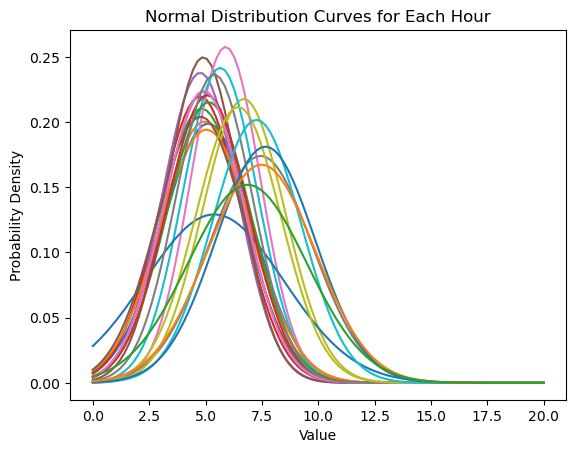

In [25]:
#plotting normal distribution curve(Bell curve) for finding any other outliers 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Extract the hour columns (00, 01, ..., 22, 23)
hour_columns = output.columns[1:-1]

# Create a figure and axes
fig, ax = plt.subplots()

# Iterate over the hour columns
for hour in hour_columns:
    # Get the values for the current hour
    values = output[hour]

    # Fit a normal distribution to the data
    mu, sigma = norm.fit(values)

    # Generate x values for the range of the distribution
    x = np.linspace(0, 20, 100)

    # Compute the corresponding y values using the fitted distribution
    y = norm.pdf(x, mu, sigma)

    # Plot the normal distribution curve
    ax.plot(x, y, label=hour)

# Set the labels and title
ax.set_xlabel('Value')
ax.set_ylabel('Probability Density')
ax.set_title('Normal Distribution Curves for Each Hour')

# Add a legend
#ax.legend()

# Display the plot
plt.show()


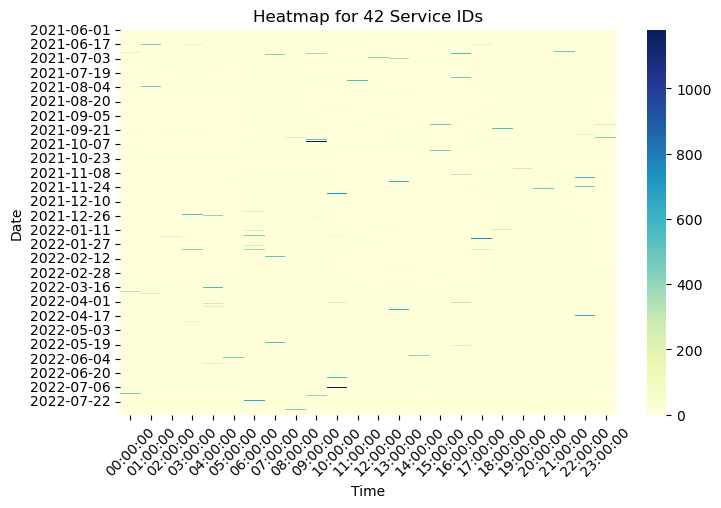

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_df, cmap='YlGnBu')
plt.title('Heatmap for 42 Service IDs')
plt.xlabel('Time')
plt.ylabel('Date')
plt.xticks(rotation=45)
plt.show()

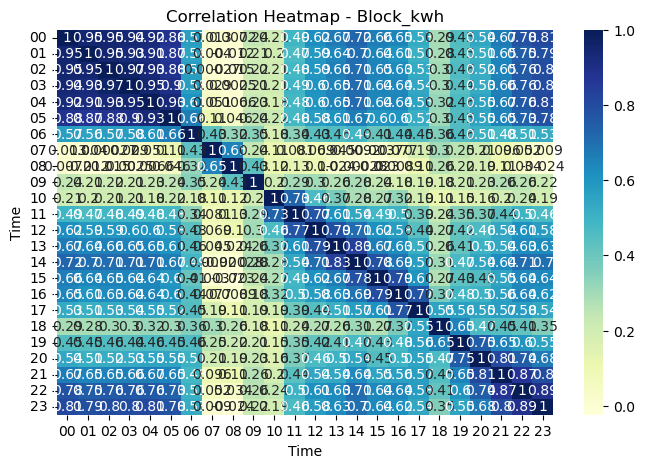

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = output.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, cmap='YlGnBu', annot=True)

plt.xlabel('Time')
plt.ylabel('Time')
plt.title('Correlation Heatmap - Block_kwh')

plt.show()

In [28]:
#Getting weather data
import pandas as pd
weather_data_df = pd.read_csv('C:/Users/vanda/Desktop/AI Days/Internship/weather_data.csv')
weather_data_df

,Unnamed: 0,datetime,temp,humidity,dew,feelslike
0,0,2021-06-01 00:00:00,26.000000,94.230003,25.000000,26.000000
1,1,2021-06-01 01:00:00,26.000000,94.230003,25.000000,26.000000
2,2,2021-06-01 02:00:00,27.100000,64.720001,19.900000,28.600000
3,3,2021-06-01 03:00:00,24.000000,94.150002,23.000000,24.000000
4,4,2021-06-01 04:00:00,25.000000,94.190002,24.000000,25.000000
...,...,...,...,...,...,...
10339,10339,2022-08-05 19:00:00,25.000000,93.839996,23.900000,25.000000
10340,10340,2022-08-05 20:00:00,25.000000,94.010002,23.900000,25.000000
10341,10341,2022-08-05 21:00:00,24.900000,94.190002,23.900000,24.900000
10342,10342,2022-08-05 22:00:00,24.000000,94.150002,23.000000,24.000000


In [29]:
# Pivoting the DataFrame
weather_data_df['datetime'] = pd.to_datetime(weather_data_df['datetime'])

# Extract date and time components
weather_data_df['DATE'] = weather_data_df['datetime'].dt.date
weather_data_df['TIME'] = weather_data_df['datetime'].dt.time
weather_data_df

,Unnamed: 0,datetime,temp,humidity,dew,feelslike,DATE,TIME
0,0,2021-06-01 00:00:00,26.000000,94.230003,25.000000,26.000000,2021-06-01,00:00:00
1,1,2021-06-01 01:00:00,26.000000,94.230003,25.000000,26.000000,2021-06-01,01:00:00
2,2,2021-06-01 02:00:00,27.100000,64.720001,19.900000,28.600000,2021-06-01,02:00:00
3,3,2021-06-01 03:00:00,24.000000,94.150002,23.000000,24.000000,2021-06-01,03:00:00
4,4,2021-06-01 04:00:00,25.000000,94.190002,24.000000,25.000000,2021-06-01,04:00:00
...,...,...,...,...,...,...,...,...
10339,10339,2022-08-05 19:00:00,25.000000,93.839996,23.900000,25.000000,2022-08-05,19:00:00
10340,10340,2022-08-05 20:00:00,25.000000,94.010002,23.900000,25.000000,2022-08-05,20:00:00
10341,10341,2022-08-05 21:00:00,24.900000,94.190002,23.900000,24.900000,2022-08-05,21:00:00
10342,10342,2022-08-05 22:00:00,24.000000,94.150002,23.000000,24.000000,2022-08-05,22:00:00


In [30]:
#Dropping the datetime column
weather_data_df=weather_data_df.drop("datetime",axis=1)
weather_data_df

,Unnamed: 0,temp,humidity,dew,feelslike,DATE,TIME
0,0,26.000000,94.230003,25.000000,26.000000,2021-06-01,00:00:00
1,1,26.000000,94.230003,25.000000,26.000000,2021-06-01,01:00:00
2,2,27.100000,64.720001,19.900000,28.600000,2021-06-01,02:00:00
3,3,24.000000,94.150002,23.000000,24.000000,2021-06-01,03:00:00
4,4,25.000000,94.190002,24.000000,25.000000,2021-06-01,04:00:00
...,...,...,...,...,...,...,...
10339,10339,25.000000,93.839996,23.900000,25.000000,2022-08-05,19:00:00
10340,10340,25.000000,94.010002,23.900000,25.000000,2022-08-05,20:00:00
10341,10341,24.900000,94.190002,23.900000,24.900000,2022-08-05,21:00:00
10342,10342,24.000000,94.150002,23.000000,24.000000,2022-08-05,22:00:00


In [31]:
#Dropping the unnamed column 
weather_data_df=weather_data_df.drop("Unnamed: 0",axis=1)
weather_data_df

,temp,humidity,dew,feelslike,DATE,TIME
0,26.000000,94.230003,25.000000,26.000000,2021-06-01,00:00:00
1,26.000000,94.230003,25.000000,26.000000,2021-06-01,01:00:00
2,27.100000,64.720001,19.900000,28.600000,2021-06-01,02:00:00
3,24.000000,94.150002,23.000000,24.000000,2021-06-01,03:00:00
4,25.000000,94.190002,24.000000,25.000000,2021-06-01,04:00:00
...,...,...,...,...,...,...
10339,25.000000,93.839996,23.900000,25.000000,2022-08-05,19:00:00
10340,25.000000,94.010002,23.900000,25.000000,2022-08-05,20:00:00
10341,24.900000,94.190002,23.900000,24.900000,2022-08-05,21:00:00
10342,24.000000,94.150002,23.000000,24.000000,2022-08-05,22:00:00


In [32]:
#printing the column names
print(weather_data_df.columns)

Index(['temp', 'humidity', 'dew', 'feelslike', 'DATE', 'TIME'], dtype='object')


In [33]:
#arranging columns in order
new_column_order = ['DATE', 'TIME', 'temp', 'humidity', 'dew', 'feelslike']
weather_data_df = weather_data_df.reindex(columns=new_column_order)
weather_data_df

,DATE,TIME,temp,humidity,dew,feelslike
0,2021-06-01,00:00:00,26.000000,94.230003,25.000000,26.000000
1,2021-06-01,01:00:00,26.000000,94.230003,25.000000,26.000000
2,2021-06-01,02:00:00,27.100000,64.720001,19.900000,28.600000
3,2021-06-01,03:00:00,24.000000,94.150002,23.000000,24.000000
4,2021-06-01,04:00:00,25.000000,94.190002,24.000000,25.000000
...,...,...,...,...,...,...
10339,2022-08-05,19:00:00,25.000000,93.839996,23.900000,25.000000
10340,2022-08-05,20:00:00,25.000000,94.010002,23.900000,25.000000
10341,2022-08-05,21:00:00,24.900000,94.190002,23.900000,24.900000
10342,2022-08-05,22:00:00,24.000000,94.150002,23.000000,24.000000


In [34]:
pivoted_df = weather_data_df.pivot_table(index='DATE', columns='TIME', values=['temp','dew','humidity','feelslike'], fill_value=0)
pivoted_df

dew                                                            \
TIME       00:00:00 01:00:00   02:00:00 03:00:00 04:00:00   05:00:00 06:00:00   
DATE                                                                            
2021-06-01     25.0     25.0  19.900000     23.0     24.0  20.000000     24.0   
2021-06-02     24.0     24.0  22.100000     22.0     23.0  21.700001     24.0   
2021-06-03     24.0     24.0  23.400000     24.0     24.0  22.400000     23.0   
2021-06-04     24.0     24.0  21.900000     23.0     23.0  22.000000     23.0   
2021-06-05     24.0     23.0  23.200001     22.0     22.0  21.700001     22.0   
...             ...      ...        ...      ...      ...        ...      ...   
2022-08-01     24.0     23.0  22.900000     23.5     23.0  23.299999     23.0   
2022-08-02     24.0     23.5  23.200001     24.0     24.0  23.200001     24.0   
2022-08-03     24.0     24.0  23.700001     23.5     23.0  22.600000     23.0   
2022-08-04     22.0     22.0  22.900000     23.0     22.0  24.000000     22.5   
2022-08-05     23.0     23.0  22.600000     23.0     23.0  22.400000     22.5   

                                         ...       temp                        \
TIME       07:00:00   08:00:00 09:00:00  ...   14:00:00   15:00:00   16:00:00   
DATE                                     ...                                    
2021-06-01     22.1  22.500000     24.0  ...  35.000000  34.000000  34.500000   
2021-06-02     25.0  23.299999     24.1  ...  32.700001  29.000000  28.100000   
2021-06-03     23.0  22.400000     22.0  ...  27.299999  28.100000  29.100000   
2021-06-04     24.0  22.299999     23.0  ...  28.299999  24.299999  24.299999   
2021-06-05     22.0  21.600000     21.0  ...  33.400002  32.900002  32.000000   
...             ...        ...      ...  ...        ...        ...        ...   
2022-08-01     24.0  24.799999     25.9  ...  24.700001  24.700001  25.100000   
2022-08-02     23.9  22.400000     22.9  ...  29.900000  26.000000  27.700001   
2022-08-03     24.9  24.500000     25.1  ...  30.900000  30.000000  30.900000   
2022-08-04     24.9  24.299999     25.0  ...  25.000000  24.000000  24.100000   
2022-08-05     22.1  22.900000     23.0  ...  29.900000  28.100000  26.100000   

                                                                            \
TIME         17:00:00   18:00:00   19:00:00   20:00:00   21:00:00 22:00:00   
DATE                                                                         
2021-06-01  34.900002  28.900000  28.799999  29.900000  28.900000     27.0   
2021-06-02  29.200001  28.100000  28.000000  28.900000  28.000000     28.0   
2021-06-03  30.100000  28.100000  27.100000  27.700001  27.000000     27.0   
2021-06-04  24.900000  24.100000  23.100000  24.900000  25.000000     25.0   
2021-06-05  32.099998  30.100000  29.100000  30.799999  28.000000     28.0   
...               ...        ...        ...        ...        ...      ...   
2022-08-01  26.600000  24.200001  24.200001  25.200001  24.200001     26.0   
2022-08-02  26.799999  24.900000  24.900000  24.900000  24.000000     24.0   
2022-08-03  29.799999  28.000000  25.900000  26.000000  24.900000     24.0   
2022-08-04  25.700001  24.000000  24.900000  25.000000  24.000000     23.0   
2022-08-05  25.700001  25.000000  25.000000  25.000000  24.900000     24.0   

                       
TIME         23:00:00  
DATE                   
2021-06-01  28.900000  
2021-06-02  28.400000  
2021-06-03  27.500000  
2021-06-04  25.000000  
2021-06-05  28.799999  
...               ...  
2022-08-01  25.400000  
2022-08-02  24.799999  
2022-08-03  24.900000  
2022-08-04  25.200001  
2022-08-05  25.200001  

[431 rows x 96 columns]

In [35]:
pivoted_df.columns = pivoted_df.columns.map(lambda x: f'{x[1]}_{x[0]}')
# Reset the index to make 'DATE' a regular column
pivoted_df.reset_index(inplace=True)
pivoted_df

,DATE,00:00:00_dew,01:00:00_dew,02:00:00_dew,03:00:00_dew,04:00:00_dew,05:00:00_dew,06:00:00_dew,07:00:00_dew,08:00:00_dew,...,14:00:00_temp,15:00:00_temp,16:00:00_temp,17:00:00_temp,18:00:00_temp,19:00:00_temp,20:00:00_temp,21:00:00_temp,22:00:00_temp,23:00:00_temp
0,2021-06-01,25.0,25.0,19.900000,23.0,24.0,20.000000,24.0,22.1,22.500000,...,35.000000,34.000000,34.500000,34.900002,28.900000,28.799999,29.900000,28.900000,27.0,28.900000
1,2021-06-02,24.0,24.0,22.100000,22.0,23.0,21.700001,24.0,25.0,23.299999,...,32.700001,29.000000,28.100000,29.200001,28.100000,28.000000,28.900000,28.000000,28.0,28.400000
2,2021-06-03,24.0,24.0,23.400000,24.0,24.0,22.400000,23.0,23.0,22.400000,...,27.299999,28.100000,29.100000,30.100000,28.100000,27.100000,27.700001,27.000000,27.0,27.500000
3,2021-06-04,24.0,24.0,21.900000,23.0,23.0,22.000000,23.0,24.0,22.299999,...,28.299999,24.299999,24.299999,24.900000,24.100000,23.100000,24.900000,25.000000,25.0,25.000000
4,2021-06-05,24.0,23.0,23.200001,22.0,22.0,21.700001,22.0,22.0,21.600000,...,33.400002,32.900002,32.000000,32.099998,30.100000,29.100000,30.799999,28.000000,28.0,28.799999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,2022-08-01,24.0,23.0,22.900000,23.5,23.0,23.299999,23.0,24.0,24.799999,...,24.700001,24.700001,25.100000,26.600000,24.200001,24.200001,25.200001,24.200001,26.0,25.400000
427,2022-08-02,24.0,23.5,23.200001,24.0,24.0,23.200001,24.0,23.9,22.400000,...,29.900000,26.000000,27.700001,26.799999,24.900000,24.900000,24.900000,24.000000,24.0,24.799999
428,2022-08-03,24.0,24.0,23.700001,23.5,23.0,22.600000,23.0,24.9,24.500000,...,30.900000,30.000000,30.900000,29.799999,28.000000,25.900000,26.000000,24.900000,24.0,24.900000
429,2022-08-04,22.0,22.0,22.900000,23.0,22.0,24.000000,22.5,24.9,24.299999,...,25.000000,24.000000,24.100000,25.700001,24.000000,24.900000,25.000000,24.000000,23.0,25.200001


In [36]:
new_column_order=['DATE', '00:00:00_temp', '00:00:00_humidity', '00:00:00_dew','00:00:00_feelslike',
                        '01:00:00_temp', '01:00:00_humidity', '01:00:00_dew','01:00:00_feelslike',
                            '02:00:00_temp', '02:00:00_humidity', '02:00:00_dew','02:00:00_feelslike',
                            '03:00:00_temp', '03:00:00_humidity', '03:00:00_dew','03:00:00_feelslike',
                            '04:00:00_temp', '04:00:00_humidity', '04:00:00_dew','04:00:00_feelslike',
                            '05:00:00_temp', '05:00:00_humidity', '05:00:00_dew','05:00:00_feelslike',
                            '06:00:00_temp', '06:00:00_humidity', '06:00:00_dew','06:00:00_feelslike',
                            '07:00:00_temp', '07:00:00_humidity', '07:00:00_dew','07:00:00_feelslike',
                            '08:00:00_temp', '08:00:00_humidity', '08:00:00_dew','08:00:00_feelslike',
                            '09:00:00_temp', '09:00:00_humidity', '09:00:00_dew','09:00:00_feelslike',
                            '10:00:00_temp', '10:00:00_humidity', '10:00:00_dew','10:00:00_feelslike',
                            '11:00:00_temp', '11:00:00_humidity', '11:00:00_dew','11:00:00_feelslike',
                            '12:00:00_temp', '12:00:00_humidity', '12:00:00_dew','12:00:00_feelslike',
                            '13:00:00_temp', '13:00:00_humidity', '13:00:00_dew','13:00:00_feelslike',
                            '14:00:00_temp', '14:00:00_humidity', '14:00:00_dew','14:00:00_feelslike',
                            '15:00:00_temp', '15:00:00_humidity', '15:00:00_dew','15:00:00_feelslike',
                            '16:00:00_temp', '16:00:00_humidity', '16:00:00_dew','16:00:00_feelslike',
                            '17:00:00_temp', '17:00:00_humidity', '17:00:00_dew','17:00:00_feelslike',
                            '18:00:00_temp', '18:00:00_humidity', '18:00:00_dew','18:00:00_feelslike',
                            '19:00:00_temp', '19:00:00_humidity', '19:00:00_dew','19:00:00_feelslike',
                            '20:00:00_temp', '20:00:00_humidity', '20:00:00_dew','20:00:00_feelslike',
                            '21:00:00_temp', '21:00:00_humidity', '21:00:00_dew','21:00:00_feelslike',
                            '22:00:00_temp', '22:00:00_humidity', '22:00:00_dew','22:00:00_feelslike',
                            '23:00:00_temp', '23:00:00_humidity', '23:00:00_dew','23:00:00_feelslike']

# Reorder the columns
pivoted_df_1= pivoted_df.reindex(columns=new_column_order)

# Print the DataFrame
print(pivoted_df_1)

           DATE  00:00:00_temp  00:00:00_humidity  00:00:00_dew  \
0    2021-06-01           26.0          94.230003          25.0   
1    2021-06-02           27.0          83.680000          24.0   
2    2021-06-03           25.0          94.190002          24.0   
3    2021-06-04           25.0          94.190002          24.0   
4    2021-06-05           25.0          94.190002          24.0   
..          ...            ...                ...           ...   
426  2022-08-01           25.0          94.190002          24.0   
427  2022-08-02           25.0          94.190002          24.0   
428  2022-08-03           24.0         100.000000          24.0   
429  2022-08-04           24.0          88.599998          22.0   
430  2022-08-05           23.5          97.000000          23.0   

     00:00:00_feelslike  01:00:00_temp  01:00:00_humidity  01:00:00_dew  \
0                  26.0           26.0          94.230003          25.0   
1                  30.1           27.0       

In [37]:
pivoted_df_1.to_csv("Bweather.csv")

In [38]:
Bmerge1=pd.read_csv("C:/Users/vanda/Bmerge1.csv")
pivoted_df_1=pd.read_csv("C:/Users/vanda/Bweather.csv")
concat_df = pd.merge(Bmerge1,pivoted_df_1,how='outer',on = 'DATE')
concat_df

,DATE,00:00:00_29369,00:00:00_29371,00:00:00_29379,00:00:00_29380,00:00:00_29430,00:00:00_29432,00:00:00_29433,00:00:00_29434,00:00:00_29435,...,21:00:00_dew,21:00:00_feelslike,22:00:00_temp,22:00:00_humidity,22:00:00_dew,22:00:00_feelslike,23:00:00_temp,23:00:00_humidity,23:00:00_dew,23:00:00_feelslike
0,2021-06-01,0.21,0.19,0.89,0.03,0.00,0.63,0.14,0.10,0.04,...,21.1,31.400000,27.0,83.680000,24.000000,30.100000,28.900000,62.490002,21.000000,31.299999
1,2021-06-02,0.19,0.20,0.18,0.04,0.04,0.62,0.15,0.09,0.04,...,26.0,33.599998,28.0,83.790001,25.000000,32.700001,28.400000,78.769997,24.299999,32.799999
2,2021-06-03,0.22,0.19,0.19,0.00,0.05,0.51,0.13,0.09,0.03,...,25.0,30.600000,27.0,88.839996,25.000000,30.600000,27.500000,80.459999,23.799999,30.900000
3,2021-06-04,0.09,0.18,0.19,0.08,0.05,0.60,0.18,0.09,0.04,...,23.0,25.000000,25.0,88.680000,23.000000,25.000000,25.000000,91.089996,23.500000,25.000000
4,2021-06-05,0.10,0.13,0.20,0.08,0.05,0.21,0.14,0.10,0.04,...,25.0,32.700001,28.0,83.790001,25.000000,32.700001,28.799999,68.410004,22.400000,32.099998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,2022-08-01,0.03,0.11,0.39,0.08,0.05,0.07,0.18,0.04,0.04,...,24.0,24.200001,26.0,88.760002,24.000000,26.000000,25.400000,87.769997,23.200001,25.400000
427,2022-08-02,0.05,0.11,0.37,0.16,0.06,0.17,0.09,0.07,0.05,...,23.9,24.000000,24.0,99.250000,23.799999,24.000000,24.799999,94.040001,23.799999,24.799999
428,2022-08-03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,22.9,24.900000,24.0,88.599998,22.000000,24.000000,24.900000,83.110001,21.900000,24.900000
429,2022-08-04,0.05,0.14,0.37,0.14,0.06,0.18,0.14,0.06,0.03,...,22.9,24.000000,23.0,94.110001,22.000000,23.000000,25.200001,89.300003,23.299999,25.200001


In [39]:
concat_df=concat_df.drop('Unnamed: 0', axis = 1)
concat_df

,DATE,00:00:00_29369,00:00:00_29371,00:00:00_29379,00:00:00_29380,00:00:00_29430,00:00:00_29432,00:00:00_29433,00:00:00_29434,00:00:00_29435,...,21:00:00_dew,21:00:00_feelslike,22:00:00_temp,22:00:00_humidity,22:00:00_dew,22:00:00_feelslike,23:00:00_temp,23:00:00_humidity,23:00:00_dew,23:00:00_feelslike
0,2021-06-01,0.21,0.19,0.89,0.03,0.00,0.63,0.14,0.10,0.04,...,21.1,31.400000,27.0,83.680000,24.000000,30.100000,28.900000,62.490002,21.000000,31.299999
1,2021-06-02,0.19,0.20,0.18,0.04,0.04,0.62,0.15,0.09,0.04,...,26.0,33.599998,28.0,83.790001,25.000000,32.700001,28.400000,78.769997,24.299999,32.799999
2,2021-06-03,0.22,0.19,0.19,0.00,0.05,0.51,0.13,0.09,0.03,...,25.0,30.600000,27.0,88.839996,25.000000,30.600000,27.500000,80.459999,23.799999,30.900000
3,2021-06-04,0.09,0.18,0.19,0.08,0.05,0.60,0.18,0.09,0.04,...,23.0,25.000000,25.0,88.680000,23.000000,25.000000,25.000000,91.089996,23.500000,25.000000
4,2021-06-05,0.10,0.13,0.20,0.08,0.05,0.21,0.14,0.10,0.04,...,25.0,32.700001,28.0,83.790001,25.000000,32.700001,28.799999,68.410004,22.400000,32.099998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,2022-08-01,0.03,0.11,0.39,0.08,0.05,0.07,0.18,0.04,0.04,...,24.0,24.200001,26.0,88.760002,24.000000,26.000000,25.400000,87.769997,23.200001,25.400000
427,2022-08-02,0.05,0.11,0.37,0.16,0.06,0.17,0.09,0.07,0.05,...,23.9,24.000000,24.0,99.250000,23.799999,24.000000,24.799999,94.040001,23.799999,24.799999
428,2022-08-03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,22.9,24.900000,24.0,88.599998,22.000000,24.000000,24.900000,83.110001,21.900000,24.900000
429,2022-08-04,0.05,0.14,0.37,0.14,0.06,0.18,0.14,0.06,0.03,...,22.9,24.000000,23.0,94.110001,22.000000,23.000000,25.200001,89.300003,23.299999,25.200001


In [40]:
concat_df = concat_df.set_index('DATE')
concat_df

,00:00:00_29369,00:00:00_29371,00:00:00_29379,00:00:00_29380,00:00:00_29430,00:00:00_29432,00:00:00_29433,00:00:00_29434,00:00:00_29435,00:00:00_29436,...,21:00:00_dew,21:00:00_feelslike,22:00:00_temp,22:00:00_humidity,22:00:00_dew,22:00:00_feelslike,23:00:00_temp,23:00:00_humidity,23:00:00_dew,23:00:00_feelslike
DATE,,,,,,,,,,,,,,,,,,,,,
2021-06-01,0.21,0.19,0.89,0.03,0.00,0.63,0.14,0.10,0.04,0.24,...,21.1,31.400000,27.0,83.680000,24.000000,30.100000,28.900000,62.490002,21.000000,31.299999
2021-06-02,0.19,0.20,0.18,0.04,0.04,0.62,0.15,0.09,0.04,0.29,...,26.0,33.599998,28.0,83.790001,25.000000,32.700001,28.400000,78.769997,24.299999,32.799999
2021-06-03,0.22,0.19,0.19,0.00,0.05,0.51,0.13,0.09,0.03,0.29,...,25.0,30.600000,27.0,88.839996,25.000000,30.600000,27.500000,80.459999,23.799999,30.900000
2021-06-04,0.09,0.18,0.19,0.08,0.05,0.60,0.18,0.09,0.04,0.23,...,23.0,25.000000,25.0,88.680000,23.000000,25.000000,25.000000,91.089996,23.500000,25.000000
2021-06-05,0.10,0.13,0.20,0.08,0.05,0.21,0.14,0.10,0.04,0.23,...,25.0,32.700001,28.0,83.790001,25.000000,32.700001,28.799999,68.410004,22.400000,32.099998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,0.03,0.11,0.39,0.08,0.05,0.07,0.18,0.04,0.04,0.17,...,24.0,24.200001,26.0,88.760002,24.000000,26.000000,25.400000,87.769997,23.200001,25.400000
2022-08-02,0.05,0.11,0.37,0.16,0.06,0.17,0.09,0.07,0.05,0.16,...,23.9,24.000000,24.0,99.250000,23.799999,24.000000,24.799999,94.040001,23.799999,24.799999
2022-08-03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,22.9,24.900000,24.0,88.599998,22.000000,24.000000,24.900000,83.110001,21.900000,24.900000


In [41]:
sort = concat_df.reindex(sorted(concat_df.columns),axis=1)
sort

,00:00:00_29369,00:00:00_29371,00:00:00_29379,00:00:00_29380,00:00:00_29430,00:00:00_29432,00:00:00_29433,00:00:00_29434,00:00:00_29435,00:00:00_29436,...,23:00:00_48472,23:00:00_48481,23:00:00_48483,23:00:00_48484,23:00:00_48536,23:00:00_49815,23:00:00_dew,23:00:00_feelslike,23:00:00_humidity,23:00:00_temp
DATE,,,,,,,,,,,,,,,,,,,,,
2021-06-01,0.21,0.19,0.89,0.03,0.00,0.63,0.14,0.10,0.04,0.24,...,0.28,0.17,0.50,0.22,0.29,0.19,21.000000,31.299999,62.490002,28.900000
2021-06-02,0.19,0.20,0.18,0.04,0.04,0.62,0.15,0.09,0.04,0.29,...,0.34,0.24,0.33,0.20,0.27,0.20,24.299999,32.799999,78.769997,28.400000
2021-06-03,0.22,0.19,0.19,0.00,0.05,0.51,0.13,0.09,0.03,0.29,...,0.25,0.24,0.16,0.14,0.36,0.17,23.799999,30.900000,80.459999,27.500000
2021-06-04,0.09,0.18,0.19,0.08,0.05,0.60,0.18,0.09,0.04,0.23,...,0.22,0.19,0.12,0.14,0.20,0.19,23.500000,25.000000,91.089996,25.000000
2021-06-05,0.10,0.13,0.20,0.08,0.05,0.21,0.14,0.10,0.04,0.23,...,0.22,0.15,0.55,0.16,0.20,0.13,22.400000,32.099998,68.410004,28.799999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,0.03,0.11,0.39,0.08,0.05,0.07,0.18,0.04,0.04,0.17,...,0.23,0.14,0.18,0.23,0.31,0.02,23.200001,25.400000,87.769997,25.400000
2022-08-02,0.05,0.11,0.37,0.16,0.06,0.17,0.09,0.07,0.05,0.16,...,0.00,0.00,0.00,0.00,0.00,0.00,23.799999,24.799999,94.040001,24.799999
2022-08-03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.23,0.14,0.18,0.25,0.23,0.15,21.900000,24.900000,83.110001,24.900000


In [42]:
sort.to_csv("sort.csv")

In [43]:
#model preparing
model_df = pd.read_csv('sort.csv', index_col='DATE')
X=model_df.iloc[:,2:1105].values
Y=model_df.iloc[:,1].values
#split the data set into 75% training and 25%testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [44]:
#resize the distribution of values(removes the mean and scales to unit variance)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
X_train

array([[-0.69272887, -0.83146021, -0.90124669, ...,  0.0653719 ,
         0.42850502,  0.19368682],
       [-0.51362538,  1.46393849, -0.25828108, ...,  0.0653719 ,
         0.4951144 ,  0.19368682],
       [-0.23217705, -0.52540705,  0.06320173, ...,  0.89393883,
        -0.0161274 ,  0.56423416],
       ...,
       [-0.41128053, -0.83146021,  1.34913295, ..., -0.22863579,
         1.27165573, -0.14598202],
       [-0.38569432, -0.1428406 , -0.09753967, ..., -0.49591541,
         1.41569156, -0.45477177],
       [-0.36010811, -0.37238047, -0.41902248, ..., -0.62955522,
         1.21016995, -0.60916664]])

In [45]:
#checking which model is best(SVM model)
from sklearn.svm import SVR
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, Y_train)

# Evaluate the model
score = svm_model.score(X_test, Y_test)
print("accuracy score:", score)

accuracy score: 0.09222794499934384


In [46]:
#before checking of XG boost algorithm we have to install(conda install -c conda-forge xgboost)in anaconda prompt

In [47]:
#checking the XG boost algorithm is best or not 
import xgboost as xgb
from sklearn.metrics import r2_score

dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.1,
    'max_depth': 3
        }

# Train the XGBoost model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the test data
predictions = xgb_model.predict(dtest)

# Calculate the model score
score = r2_score(Y_test, predictions)
print("Model score:", score)

Model score: 0.8128371407701471


In [48]:
#model score is high so prefer XG boost and printing unique values in y 
actual_values = list(Y)
print(actual_values)

[0.19, 0.2, 0.19, 0.18, 0.13, 0.17, 0.13, 0.11, 0.15, 0.08, 0.11, 0.11, 0.06, 0.21, 0.15, 0.17, 0.17, 0.12, 0.05, 0.04, 0.06, 0.1, 0.11, 0.1, 0.09, 0.06, 0.08, 0.05, 0.05, 0.06, 0.18, 0.12, 0.05, 0.14, 0.16, 0.15, 0.17, 0.16, 0.14, 0.16, 0.17, 0.12, 0.08, 0.11, 0.0, 0.04, 0.0, 0.12, 0.1, 0.06, 0.06, 0.01, 0.06, 0.04, 0.08, 0.07, 0.05, 0.06, 0.06, 0.06, 0.06, 0.1, 0.06, 0.09, 0.03, 0.09, 0.05, 0.17, 0.16, 0.16, 0.09, 0.09, 0.09, 0.0, 0.0, 0.0, 0.0, 0.13, 0.08, 0.07, 0.06, 0.0, 0.0, 0.13, 0.08, 0.1, 0.12, 0.13, 0.12, 0.14, 0.12, 0.02, 0.03, 0.06, 0.0, 0.03, 0.06, 0.05, 0.04, 0.06, 0.01, 0.0, 0.02, 0.02, 0.05, 0.03, 0.07, 0.06, 0.1, 0.05, 0.1, 0.09, 0.05, 0.02, 0.04, 0.0, 0.05, 0.1, 0.0, 0.04, 0.06, 0.05, 0.09, 0.14, 0.07, 0.17, 0.14, 0.21, 0.12, 0.19, 0.19, 0.19, 0.21, 0.15, 0.15, 0.13, 0.22, 0.16, 0.14, 0.2, 0.15, 0.15, 0.11, 0.11, 0.12, 0.13, 0.16, 0.18, 0.0, 0.15, 0.0, 0.2, 0.0, 0.08, 0.05, 0.02, 0.04, 0.21, 0.12, 0.16, 0.17, 0.09, 0.1, 0.07, 0.1, 0.1, 0.1, 0.09, 0.09, 0.04, 0.12, 0.0

In [49]:
len(actual_values)

431

In [50]:
#fitting the model into the algorithm
model = xgb.XGBRegressor()
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [51]:
#creating the pickle file
import pickle
with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [52]:
#opening the pickle file
import pickle
with open('xgboost_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [53]:
#to get predicted values 
predicted_values = xgb_model.predict(dtest)
predicted_values

array([ 0.01305968,  0.18741676,  0.06556074,  0.08877023,  0.08566029,
        0.04966875,  0.21458717,  0.05039715,  0.05656574,  0.1786474 ,
        0.08683447,  0.20943227,  0.07038456,  0.01868859,  0.04752349,
        0.16019318,  0.03998812,  0.0541001 ,  0.02541398,  0.16408932,
        0.17745994,  0.19043843,  0.11219706,  0.20390698,  0.16121142,
        0.19430336,  0.08457012,  0.16156009,  0.2100099 ,  0.08120402,
        0.06173623,  0.19899568,  0.04855097,  0.11696656,  0.03057902,
        0.03944592, -0.00473705,  0.2117801 ,  0.20079093,  0.11214886,
        0.08602007,  0.13476832,  0.19512774,  0.12106234,  0.17572333,
        0.05278369,  0.05995527,  0.19528078,  0.1272294 ,  0.09401996,
        0.06500304,  0.20599325,  0.14132075,  0.10985571,  0.03832167,
        0.1302819 ,  0.21059033,  0.15967591,  0.33147925,  0.16338043,
        0.18931037,  0.05130125,  0.21504901,  0.20846865,  0.13983846,
        0.09241553,  0.20556027,  0.04832358,  0.01787371,  0.12

In [54]:
Y_test

array([0.05, 0.2 , 0.08, 0.09, 0.11, 0.08, 0.21, 0.02, 0.06, 0.21, 0.1 ,
       0.23, 0.03, 0.02, 0.04, 0.14, 0.01, 0.06, 0.02, 0.16, 0.17, 0.19,
       0.12, 0.2 , 0.16, 0.19, 0.  , 0.17, 0.22, 0.06, 0.06, 0.21, 0.04,
       0.11, 0.02, 0.05, 0.02, 0.22, 0.26, 0.12, 0.08, 0.14, 0.21, 0.13,
       0.17, 0.06, 0.06, 0.2 , 0.06, 0.09, 0.05, 0.21, 0.13, 0.09, 0.04,
       0.1 , 0.23, 0.16, 0.1 , 0.16, 0.21, 0.06, 0.24, 0.21, 0.14, 0.09,
       0.21, 0.04, 0.  , 0.11, 0.02, 0.21, 0.11, 0.  , 0.12, 0.12, 0.03,
       0.06, 0.06, 0.  , 0.08, 0.04, 0.16, 0.13, 0.06, 0.01, 0.11, 0.18,
       0.07, 0.24, 0.17, 0.02, 0.07, 0.15, 0.11, 0.15, 0.11, 0.16, 0.22,
       0.06, 0.11, 0.18, 0.15, 0.17, 0.04, 0.05, 0.12, 0.21])

In [55]:
import pandas as pd
import scipy.stats as stats
def calculate_mape(predicted_values, Y_test):
    error = np.abs((Y_test - predicted_values) / Y_test)
    mape = np.mean(error) * 100
    return mape

for i in range(len(predicted_values)):
    predicted_value = predicted_values[i]
    Y_test = actual_values[i]
    mape = calculate_mape(predicted_value, Y_test)
    print(f"The value of MAPE[{i}]: {mape}")

The value of MAPE[0]: 93.12648647709896
The value of MAPE[1]: 6.291618943214422
The value of MAPE[2]: 65.49434567752638
The value of MAPE[3]: 50.6832038362821
The value of MAPE[4]: 34.10747211713058
The value of MAPE[5]: 70.78308726058286
The value of MAPE[6]: 65.06705146569472
The value of MAPE[7]: 54.18440889228474
The value of MAPE[8]: 62.28950719038645
The value of MAPE[9]: 123.30924868583679
The value of MAPE[10]: 21.059574593197215
The value of MAPE[11]: 90.39297645742242
The value of MAPE[12]: 17.30760335922242
The value of MAPE[13]: 91.10067085850805
The value of MAPE[14]: 68.31767012675604
The value of MAPE[15]: 5.768720542683328
The value of MAPE[16]: 76.47757915889515
The value of MAPE[17]: 54.91658647855123
The value of MAPE[18]: 49.172034859657295
The value of MAPE[19]: 310.22330522537226
The value of MAPE[20]: 195.7665671904882
The value of MAPE[21]: 90.43843448162077
The value of MAPE[22]: 1.9973240115425797
The value of MAPE[23]: 103.90698313713071
The value of MAPE[24]

C:\Users\vanda\AppData\Local\Temp\ipykernel_12172\2352448008.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  error = np.abs((Y_test - predicted_values) / Y_test)


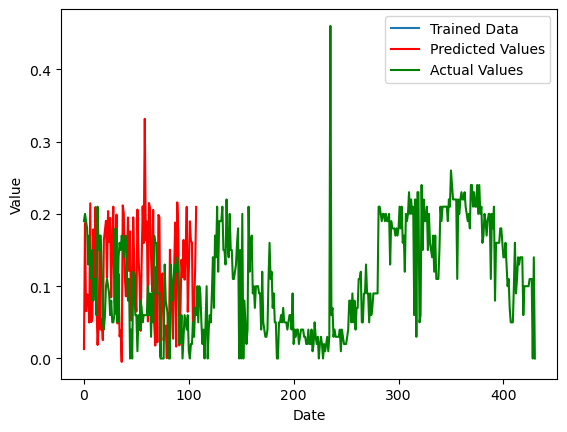

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("C:/Users/vanda/Finaldataconcat.csv")

split_index = int(0.75 * len(data))
trained_data = data[:split_index]
predicted_values = xgb_model.predict(dtest)
actual_values = list(Y)

# Convert the trained data, predicted values, and actual values to Pandas DataFrames
df_trained = pd.DataFrame(trained_data, columns=['Date', 'Value'])
df_predicted = pd.DataFrame(predicted_values, columns=['Value'])
df_actual = pd.DataFrame(actual_values, columns=['Value'])

# Plot the line graph for the last 5 days of trained data
df_trained_last_5_days = df_trained[318:323]
plt.plot(df_trained_last_5_days['Date'], df_trained_last_5_days['Value'], label='Trained Data')

# Plot the predicted values and actual values for one day
plt.plot(df_predicted.index, df_predicted['Value'], color='red', label='Predicted Values')
plt.plot(df_actual.index, df_actual['Value'], color='green', label='Actual Values')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()
